<a href="https://colab.research.google.com/github/mmmmiikkkka/my-macro-project/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FREDから実質GDP（イギリスと日本）を取得
import pandas_datareader.data as web
import pandas as pd
import numpy as np

uk_gdp = web.DataReader('UKNGDP', 'fred', start='2000-01-01')
jp_gdp = web.DataReader('JPNRGDPEXP', 'fred', start='2000-01-01')

#対数変換
uk_gdp['log_UKNGDP'] = np.log(uk_gdp['UKNGDP'])
jp_gdp['log_JPNRGDPEXP'] = np.log(jp_gdp['JPNRGDPEXP'])

#HPフィルターを適用
from statsmodels.tsa.filters.hp_filter import hpfilter

uk_cycle, uk_trend = hpfilter(uk_gdp['log_UKNGDP'], lamb=1600)
jp_cycle, jp_trend = hpfilter(jp_gdp['log_JPNRGDPEXP'], lamb=1600)
uk_cycle_aligned, jp_cycle_aligned = uk_cycle.align(jp_cycle, join='inner')

#標準偏差と相関係数の計算
uk_std = uk_cycle.std()
jp_std = jp_cycle.std()
correlation = np.corrcoef(uk_cycle_aligned, jp_cycle_aligned)[0, 1]

print("イギリスの循環成分の標準偏差:", round(uk_std, 4))
print("日本の循環成分の標準偏差:", round(jp_std, 4))
print("イギリスと日本の循環成分の相関係数:", round(correlation, 4))


イギリスの循環成分の標準偏差: 0.0246
日本の循環成分の標準偏差: 0.0163
イギリスと日本の循環成分の相関係数: 0.7636


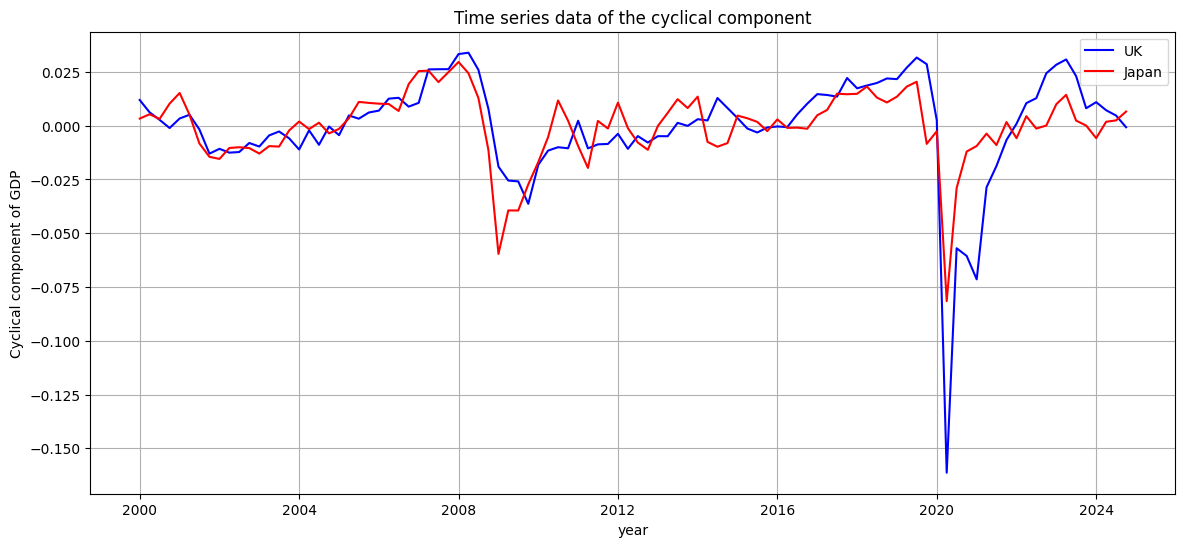

In [ ]:
#循環変動成分の時系列データのグラフ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(uk_cycle_aligned, label='UK', color='blue')
plt.plot(jp_cycle_aligned, label='Japan', color='red')

plt.title('Time series data of the cyclical component')
plt.xlabel('year')
plt.ylabel('Cyclical component of GDP')
plt.legend()

plt.grid(True)
plt.show()